# home
[show](#show)

[show all](#show-all)

[barbosa method](#Barbosa)

# create workflows

In [92]:
%load_ext autoreload
%autoreload 2

import Scheduler.Multi_Workflow
from db.definitions import Test
import pickle
from Definitions.MultiWorkflow.JobList import Constraint

# row = test_name, workload_len, resources, budget_ratio, small, medium, large, bandwidth
# each resource: [1, 1, 3] == [power is 1, price is 1, count is 3]
def create_pickle():
    row = 'test1', 10, '{"t": 0.0833333, "r": [[1, 1, 6], [2, 3, 3]]}', 0.5, 1, 0, 0, 1e50

    test = Test(row)

    job, constraint, names, sizes = Scheduler.Multi_Workflow.make_workload(test)

    names = []
    for j in job:
        i = 1
        while f'{j.type[:-1]}:{i}' in names:
            i += 1
        j.name = f'{j.type[:-1]}:{i}'
        names.append(f'{j.type[:-1]}:{i}')

    [j.name for j in job]
    cnstr = [c is Constraint.budget for c in constraint]
    variable = (row, test, job, cnstr, names, sizes)
    pickle.dump(variable, open('dump.pickle', 'wb'))

use previously saved file!
#create_pickle()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# run all

In [105]:
import Scheduler.Multi_Workflow
from db.definitions import Test
import pickle

#create_pickle()

row, test, job, constraint, names, sizes = read_jobs()
test.time_slot = 1
for r in test.resource_array:
    r[1] *= 12
bandwidth, workload_len, timeslot_list, powers, prices, numbers, power_list, price_list, timeslot_list, resource_spec, main_resources = create_resources()
makespan_list, cost_list, resources_set, graph_set, constraint_values = calculate_reference_plans()

to_write = (bandwidth, workload_len, timeslot_list, powers, prices, numbers, power_list, 
            price_list, timeslot_list, resource_spec, main_resources,
            makespan_list, cost_list, resources_set, graph_set, constraint_values)

pickle.dump(to_write, open('refrence_plan.pickle', 'wb'))

heft cost:156.0 | cost: 60.0 | heft ms:36.64 | ms:54.87 | Nodes:  25 | Deadline | factor:  5.78
heft cost:312.0 | cost:156.0 | heft ms:96.76 | ms:293.66 | Nodes:  30 | Deadline | factor:  9.42
heft cost:456.0 | cost:456.0 | heft ms:189.18 | ms:189.18 | Nodes:  25 |   Budget | factor:  7.67
heft cost:612.0 | cost:360.0 | heft ms:241.17 | ms:618.84 | Nodes:  30 | Deadline | factor:  6.81
heft cost:732.0 | cost:468.0 | heft ms:325.37 | ms:716.62 | Nodes:  30 | Deadline | factor:  5.92
heft cost:708.0 | cost:456.0 | heft ms:314.19 | ms:945.86 | Nodes:  30 | Deadline | factor: 10.67
heft cost:732.0 | cost:732.0 | heft ms:481.55 | ms:481.55 | Nodes:  24 |   Budget | factor:  3.29
heft cost:816.0 | cost:816.0 | heft ms:355.04 | ms:355.04 | Nodes:  30 |   Budget | factor:  2.08
heft cost:768.0 | cost:528.0 | heft ms:514.66 | ms:799.60 | Nodes:  24 | Deadline | factor:  6.95
heft cost:828.0 | cost:564.0 | heft ms:557.93 | ms:1366.02 | Nodes:  24 | Deadline | factor:  8.46



+---+----------+--------+--------+--------+---------+--------+--------+------+------+
|job|constraint| value  | ms old | ms new |prev cost|new cost|gap-rate|c-rate|m-rate|
+---+----------+--------+--------+--------+---------+--------+--------+------+------+
|  0| Deadline | 211.701|  54.871| 202.615|       60|   64.37| 0.02768|0.9321|1.0448|
|  1| Deadline | 911.215| 293.660| 510.950|      156|  152.13| 0.00660|1.0255|1.7834|
|  2|  Budget  |3496.686| 189.179| 191.926|      456|  317.44| 0.01197|11.0154|0.9857|
|  3| Deadline |1642.499| 618.843|1631.119|      360|  332.60| 0.00327|1.0824|1.0070|
|  4| Deadline |1925.637| 716.619|1925.476|      468|  544.80| 0.00469|0.8590|1.0001|
|  5| Deadline |3353.695| 945.864|3319.509|      456|  516.50| 0.00184|0.8829|1.0103|
|  6|  Budget  |2407.869| 481.549| 481.550|      732|  769.47| 0.00500|3.1293|1.0000|
|  7|  Budget  |1696.034| 355.043| 355.043|      816|  848.20| 0.01317|1.9996|1.0000|
|  8| Deadline |3578.770| 799.597|3477.871|      528

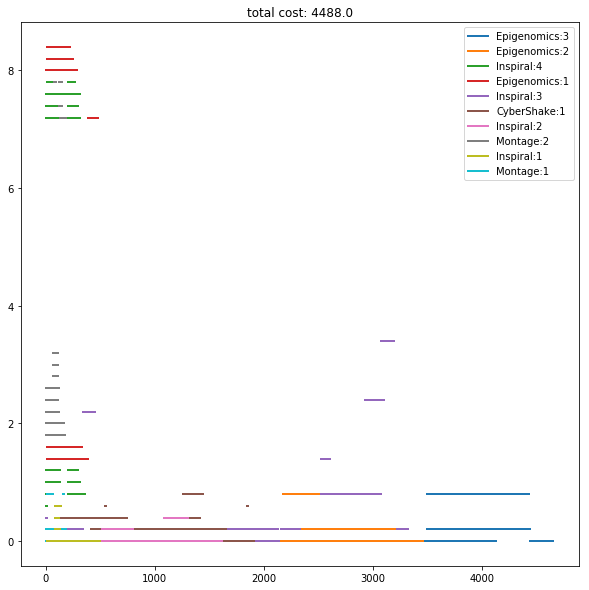

In [111]:
import Scheduler.Multi_Workflow
from db.definitions import Test
import pickle

read_object = pickle.load(open('refrence_plan.pickle', 'rb'))

bandwidth, workload_len, timeslot_list, powers, prices, numbers, power_list, price_list, timeslot_list, resource_spec, main_resources, makespan_list, cost_list, resources_set, graph_set, constraint_values = read_object

jobs, cloud_resources = create_multi_workflow_resouces()
fair_policy()
show_results()
show_schedule(cloud_resources)

# show
[home](#home)

[show all](#show-all)

# Create the multi-workflow resources

In [8]:
!rm -r images
!mkdir images
!ls images

# Scheduling

In [90]:
from Definitions.MultiWorkflow.JobList import Constraint, JobItem

from matplotlib import pyplot as plt
import numpy as np
import random

from Definitions.MultiWorkflow.JobList import Constraint
import Scheduler.ICPCP
import Scheduler.HEFT
import Scheduler.BHEFT
import Definitions.Resources
import Scheduler.BudgetPessimistic
import Scheduler.DeadlineOptimisticAlpha
import copy
import Scheduler.Multi_Workflow


%load_ext autoreload
%autoreload 2
import pickle

import Definitions


def read_jobs():
    row, test, job, cnstr, names, sizes = pickle.load(open('dump.pickle', 'rb'))
    constraint = [Constraint.budget if b else Constraint.deadline for b in cnstr]
    return row, test, job, constraint, names, sizes


def create_resources():
    bandwidth = test.bandwidth
    workload_len = test.workload_len
    timeslot_list = []
    powers = []
    prices = []
    numbers = []
    for r in test.resource_array:
        powers.append(r[0])
        prices.append(r[1])
        numbers.append(r[2])

    power_list, price_list, timeslot_list = [], [], []
    for i in range(len(test.resource_array)):
        power_list += [powers[i]] * numbers[i]
        price_list += [prices[i]] * numbers[i]
        timeslot_list += [60 * test.time_slot] * numbers[i]

    resource_spec = (power_list, price_list, timeslot_list)

    main_resources = Definitions.Resources.CostAwareResources(resource_spec[0], resource_spec[1], resource_spec[2],bandwidth)
    
    return bandwidth, workload_len, timeslot_list, powers, prices, numbers, power_list, price_list, timeslot_list, resource_spec, main_resources


def calculate_reference_plans():
    makespan_list = []
    cost_list = []
    resources_set = []
    graph_set = []
    constraint_values = []

    for i in range(workload_len):
        resources = copy.deepcopy(main_resources)
        g = copy.deepcopy(job[i])
        Scheduler.HEFT.schedule(g, resources)
        g_heft = g
        cost = resources.plan_cost
        makespan = resources.makespan

        heft_resources = resources

        if constraint[i] is Constraint.budget:
            c = 'Budget'
            budget_factor = np.random.normal(8, 3) if random.random() >= 0.2 else np.random.normal(2, 1.4)
            attempts = 3
            while attempts > 0:
                attempts -= 1
                resources = copy.deepcopy(main_resources)
                g = copy.deepcopy(job[i])
                Scheduler.BHEFT.schedule(g, resources, cost * budget_factor)
                if cost * budget_factor >= resources.plan_cost:
                    break
                budget_factor = np.random.normal(8, 3) if random.random() >= 0.2 else np.random.normal(2, 1.4)

            constraint_factor = budget_factor
            constraint_value = cost * budget_factor
        else:
            c = 'Deadline'
            deadline_factor = np.random.normal(8, 1.4) if random.random() >= 0.2 else np.random.normal(2, 1.4)

            resources = heft_resources
            attempts = 3
            while attempts > 0:
                attempts -= 1
                resources = copy.deepcopy(main_resources)
                g = copy.deepcopy(job[i])
                Scheduler.ICPCP.schedule(g, resources, makespan * deadline_factor)
                if makespan * deadline_factor >= resources.makespan:
                    break
                else:
                    deadline_factor = np.random.normal(8, 1.4) if random.random() >= 0.2 else np.random.normal(2, 1.4)
            constraint_factor = deadline_factor
            constraint_value = makespan * deadline_factor
        print("heft cost:{0:5.1f} | cost:{1:5.1f} | heft ms:{2:5.2f} | ms:{3:5.2f} "
              "| Nodes:{4:4d} | {5:>8} | factor: {6:5.2f}".format(cost, resources.plan_cost, makespan,
                                                                  resources.makespan, len(g.tasks) - 2, c,
                                                                  constraint_factor))

        # ---Store results for next use:
        makespan_list.append(resources.makespan)
        cost_list.append(resources.plan_cost)
        resources_set.append(copy.deepcopy(resources))
        graph_set.append(g)
        constraint_values.append(constraint_value)
    return makespan_list, cost_list, resources_set, graph_set, constraint_values


def show_schedule(resources, save_number=None):
    sched = resources.show_schedule()

    num_plots = sum([len(item[0]) for item in sched])
    figure_number = random.randint(1, 10000)
    fig = plt.figure(figure_number, figsize=[10,10])
    colormap = plt.cm.gist_ncar
    plt.gca().set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 0.9, num_plots)])
#    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    my_label = []
    for i, entry in enumerate(sched):
        name = entry[0]
        est = entry[1]
        eft = entry[2]
        for j in range(len(est)):
    #         print(i, est[j], eft[j])
            graph_name = name[j].split('-')[0]
            first_visit = False
            if not graph_name in my_label:
                my_label.append(graph_name)
                first_visit = True
#                 print(f'first visit for {graph_name}')
            my_color = my_label.index(graph_name)
            if first_visit:
                plt.plot([est[j], eft[j]], [i/5, i/5], linewidth=2, label=graph_name, 
                         color=colors[my_color])
            else:
                plt.plot([est[j], eft[j]], [i/5, i/5], linewidth=2, 
                         color=colors[my_color])
#             plt.text((est[j] + eft[j]) / 2, i/5 , name[j])
#     print('graph labels: ', my_label)
#     ax = fig.gca()                            # get the current axis
#     for i, p in enumerate(ax.get_lines()):    # this is the loop to change Labels and colors
#         if p.get_label() in names[:i]:    # check for Name already exists
#             idx = names.index(p.get_label())       # find ist index
#             p.set_c(ax.get_lines()[idx].get_c())   # set color
#             p.set_label('_' + p.get_label())       # hide label in auto-legend
    plt.legend(loc='center')

    plt.legend()
    plt.title(f'total cost: {resources.plan_cost}')
    if not save_number is None:
        plt.savefig(f'images/{save_number}', bbox_inches='tight')
        plt.close(figure_number)
    else:
        plt.show()

def create_multi_workflow_resouces():
    timeslot = test.time_slot
    bandwidth = test.bandwidth
    #    workload_len = test.workload_len
    powers = []
    prices = []
    numbers = []
    for r in test.resource_array:
        powers.append(r[0])
        prices.append(r[1])
        numbers.append(r[2])

    workload_len = test.workload_len

    # ----------------------- End of loading needed things.

    # Preparing the resources in the cloud:

    def type_of_resource(r_id):
        limit = 0
        for p in range(len(numbers)):
            limit += numbers[p]
            if r_id < limit:
                return p
        else:
            return -1

    n = [0] * len(numbers)
    for i in range(workload_len):
        resources = resources_set[i]
        for r in range(0, resources.len):
            if resources.resource_cost(r) != 0:
                n[type_of_resource(r)] += 1

    # TODO: decreasing resources, to force efficient use of resources!
    c_resource = 0.8 # 0.4..1.2
    for i in range(len(n)):
        n[i] = int(n[i] * c_resource)

    power_list, price_list, timeslot_list = [], [], []
    for i in range(len(test.resource_array)):
        power_list += [powers[i]] * n[i]
        price_list += [prices[i]] * n[i]
        # TODO: Tests must be changed, but it works for now (in case of change: both planner and main):
        timeslot_list += [60 * timeslot] * n[i]

    resource_spec = (power_list, price_list, timeslot_list)

    # resource_spec = ([power1] * n[0] + [power2] * n[1] + [power3] * n[2],
    #                  [price1] * n[0] + [price2] * n[1] + [price3] * n[2],
    #                  [timeslot] * (n[0] + n[1] + n[2]))

    cloud_resources = Definitions.Resources.CostAwareResources(resource_spec[0], resource_spec[1], resource_spec[2],
                                                               bandwidth)

    # -------- Making a multi-workflow list, which contains all workflows (they will schedule together)
    jobs = []
    for i in range(workload_len):
        if constraint[i] is Constraint.deadline:
            graph_set[i].makespan = makespan_list[i]  # resources_set[i].makespan
        else:
            graph_set[i].cost = cost_list[i]  # resources_set[i].plan_cost
            graph_set[i].makespan = makespan_list[i]  # resources_set[i].makespan

        prev_resources = resources_set[i]

        job_item = JobItem(copy.deepcopy(job[i]), constraint[i],
                           constraint_values[i], cloud_resources, graph_set[i], prev_resources)
        jobs.append(job_item)

    # prev_cloud_cost = 0
    # previously_scheduled_graph = -1

    current_critical = [0] * workload_len

    # gap-rate calculation:
    gap_rate = [0] * workload_len
    s = gap_rate[:]
    sum_task_number = sum(map(lambda graph: len(graph.tasks), graph_set))
    for i in range(workload_len):
        gap_rate[i] = resources_set[i].gap_rate
        s[i] = len(graph_set[i].tasks) / (gap_rate[i] * sum_task_number)
    iterator = min(s)
    ref_s = s[:]
    return jobs, cloud_resources

def fair_policy(show_online_schedule=False):
    try:
        # scheduling dummy tasks (get rid of them!):
        for i in range(workload_len):
            jobs[i].scheduler.schedule_next(do_head_nodes=True)
            cloud_resources.costs = cloud_resources.price_of_each_graph()
            # current_critical[i] = jobs[i].critical_now

        figure_number = 1
        ready_list = list(range(workload_len))
        # MAIN WHILE of Scheduler:
        while ready_list:
            cloud_resources.costs = cloud_resources.price_of_each_graph()
            for i in range(len(jobs)):
                job = jobs[i]
                consumed_cost = cloud_resources.costs[job.g.name]
                job.scheduler.remaining_budget = job.scheduler.total_budget - consumed_cost
                job.scheduler.recalculate_sub_budget()

            most_critical = -1
            criticality = 100
            ready_list_index = -1
            for index, ii in enumerate(ready_list):
                job = jobs[ii]
                current_critical = job.critical_now
                if current_critical < criticality:
                    criticality = current_critical
                    most_critical = ii
                    ready_list_index = index

            if show_online_schedule:
                show_schedule(cloud_resources, figure_number)
            figure_number += 1
            job_index = most_critical  # ready_list[most_critical]
            job = jobs[job_index]
#             print([round(j.critical_now, 2) for j in jobs if j.critical_now < 1000000000.0],
#                   f' - most critical: {jobs[most_critical].critical_now:.2f}, selected: {job.critical_now:.2f}')
            del ready_list[ready_list_index]

            job.scheduler.schedule_next(do_head_nodes=True)

            if job.scheduler.finished:
                continue
            else:
                ready_list.append(job_index)
        return
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(exc_type, fname, exc_tb.tb_lineno)
        raise e
        
def show_results():
    # ------------ printing the result of scheduling:
    print()
    costs = cloud_resources.price_of_each_graph()
    sum_separate = 0
    s_e = []
    print('+---+----------+--------+--------+--------+---------+--------+--------+------+------+')
    print('|job|constraint| value  | ms old | ms new |prev cost|new cost|gap-rate|c-rate|m-rate|')
    print('+---+----------+--------+--------+--------+---------+--------+--------+------+------+')
    for i in range(len(jobs)):
        prev_makespan = makespan_list[i]  # resources_set[i].makespan
        if graph_set[i].endID not in cloud_resources.job_task_schedule[graph_set[i].name]:
            print("|{:3d}|problem!".format(i))
            continue
        cloud_makespan = cloud_resources.job_task_schedule[graph_set[i].name][graph_set[i].endID].EFT
        prev_cost = cost_list[i]  # resources_set[i].plan_cost
        cloud_cost = costs[graph_set[i].name]
        m_rate = prev_makespan / cloud_makespan
        c_rate = prev_cost / cloud_cost
        if constraint[i] is Constraint.deadline:
            c = ' Deadline '
            m_rate = constraint_values[i] / cloud_makespan
            s_e.append(c_rate)
        else:
            c = '  Budget  '
            c_rate = constraint_values[i] / cloud_cost
            s_e.append(m_rate)
        print('|{:3d}|{}|{:8.3f}|{:8.3f}|{:8.3f}'
              '|{:9.0f}|{:8.2f}|{:8.5f}|{:6.4f}|{:6.4f}|'
              ''.format(i, c, constraint_values[i], prev_makespan, cloud_makespan,
                        prev_cost, cloud_cost, resources_set[i].gap_rate,
                        c_rate, m_rate))
        deadline = -1
        budget = -1
        if constraint[i] is Constraint.deadline:
            deadline = constraint_values[i]
        else:
            budget = constraint_values[i]

        job_name = names[i]
        job_size = len(graph_set[i].tasks) - 2

        sum_separate += cost_list[i]  # resources_set[i].plan_cost
    print('+---+----------+--------+--------+--------+---------+--------+--------+------+------+')

    A = sum(s_e) / workload_len
    sigma_u = 0
    for se in s_e:
        sigma_u += abs(se - A)
    U = sigma_u / workload_len
    print()
    print("Overall Cloud Cost:{:6.3f}".format(cloud_resources.plan_cost))
    print("Separate Runs Cost:{:6.3f}".format(sum_separate))
    print("\nUnfairness:{:8.5f}".format(U))

    cloud_resources_gap_rate = cloud_resources.gap_rate
    print("\nCloud gap-ratio:{:8.5f}".format(cloud_resources_gap_rate))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Barbosa


+---+----------+--------+--------+--------+---------+--------+--------+------+------+
|job|constraint| value  | ms old | ms new |prev cost|new cost|gap-rate|c-rate|m-rate|
+---+----------+--------+--------+--------+---------+--------+--------+------+------+
|  0| Deadline | 211.701|  54.871| 147.318|       60|   52.75| 0.02768|1.1374|1.4370|
|  1| Deadline | 911.215| 293.660| 717.013|      156|  175.61| 0.00660|0.8883|1.2708|
|  2|  Budget  |3496.686| 189.179| 189.179|      456|  392.21| 0.01197|8.9152|1.0000|
|  3| Deadline |1642.499| 618.843|1641.539|      360|  422.29| 0.00327|0.8525|1.0006|
|  4| Deadline |1925.637| 716.619|1324.594|      468|  467.49| 0.00469|1.0011|1.4538|
|  5| Deadline |3353.695| 945.864|2928.927|      456|  444.76| 0.00184|1.0253|1.1450|
|  6|  Budget  |2407.869| 481.549| 478.323|      732|  755.17| 0.00500|3.1885|1.0067|
|  7|  Budget  |1696.034| 355.043| 355.043|      816|  814.90| 0.01317|2.0813|1.0000|
|  8| Deadline |3578.770| 799.597|3559.967|      528|

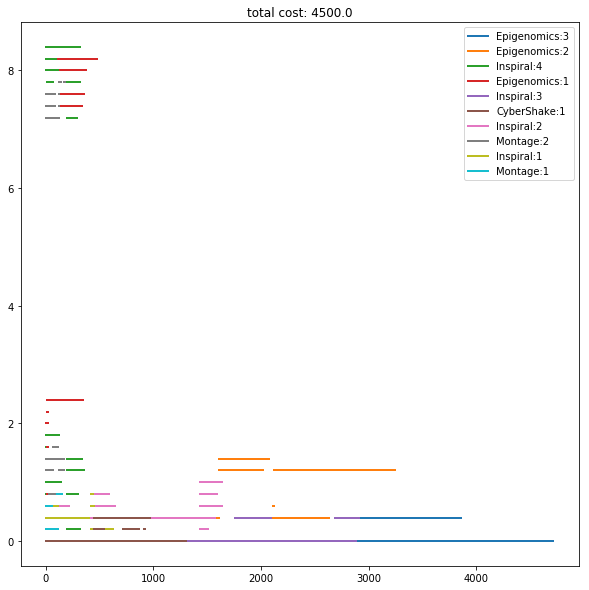

In [110]:
import Scheduler.Multi_Workflow
from db.definitions import Test
import pickle

read_object = pickle.load(open('refrence_plan.pickle', 'rb'))
bandwidth, workload_len, timeslot_list, powers, prices, numbers, power_list, price_list, timeslot_list, resource_spec, main_resources, makespan_list, cost_list, resources_set, graph_set, constraint_values = read_object


jobs, cloud_resources = create_multi_workflow_resouces()
barbosa()
show_results()
show_schedule(cloud_resources)

In [95]:
from IPython.core.debugger import set_trace

def barbosa():
    try:
        k = 1
        # scheduling dummy tasks (get rid of them!):
        for i in range(workload_len):
            jobs[i].scheduler.schedule_next(do_head_nodes=True)
            cloud_resources.costs = cloud_resources.price_of_each_graph()
            # current_critical[i] = jobs[i].critical_now

        ready_list = list(range(workload_len))
        # MAIN WHILE of Scheduler:
        while ready_list:
            cloud_resources.costs = cloud_resources.price_of_each_graph()
            for i in range(len(jobs)):
                job = jobs[i]
                consumed_cost = cloud_resources.costs[job.g.name]
                job.scheduler.remaining_budget = job.scheduler.total_budget - consumed_cost
                job.scheduler.recalculate_sub_budget()

            k += 1
            
            most_critical = -1
            criticality = 100
            ready_list_index = -1
            for index, ii in enumerate(ready_list):
                job = jobs[ii]

                SDi = job.scheduler.g.tasks[job.scheduler.last_unscheduled_task_id].sub_deadline
                if hasattr(job.reference_graph, 'deadline'):
                    Dj = job.reference_graph.deadline
                else:
                    Dj = job.reference_graph.makespan
                TimeR = (Dj - SDi) / Dj

                number_of_tasks = len(job.scheduler.priority_list)
                PRTj = (number_of_tasks - job.scheduler.last_unscheduled_task_id) / number_of_tasks
                
#                 if k >= 200:
#                     set_trace()

                current_critical = TimeR * PRTj
                if most_critical == -1 or current_critical < criticality:
                    criticality = current_critical
                    most_critical = ii
                    ready_list_index = index

            job_index = most_critical  # ready_list[most_critical]
            job = jobs[job_index]
            del ready_list[ready_list_index]

            job.scheduler.schedule_next(do_head_nodes=True)

            if job.scheduler.finished:
                continue
            else:
                ready_list.append(job_index)
        return
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(exc_type, fname, exc_tb.tb_lineno)
        raise e

# Call scheduling

In [11]:
fair_policy()

# Create scheduling movie!

In [12]:
import os
import imageio
folder = '1 img/images-old-cost-method'
filenames = [f'{folder}/{filename}.png' for filename in range(1, 1 + len(os.listdir(folder)))]
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie2.gif', images)

ModuleNotFoundError: No module named 'imageio'

# Show results

In [101]:
list(zip(cloud_resources.power, cloud_resources.price))
cloud_resources.costs

{'Montage:1': 169.79523726283736,
 'Inspiral:1': 167.1420195968036,
 'CyberShake:1': 286.7265742074594,
 'Montage:2': 418.39859611639474,
 'CyberShake:2': 578.027554087064,
 'CyberShake:3': 441.8834135662651,
 'Epigenomics:1': 489.88470380306796,
 'Montage:3': 463.7415628648638,
 'Epigenomics:2': 549.7913710456814,
 'Epigenomics:3': 484.6089674495605}

In [90]:
cloud_resources.plan_cost/sum([costs[k] for k in costs])

0.982473463342385

# show all
[home](#home)

[show](#show)

[barbosa method](#Barbosa)